# Kaggle Dec 23 Workflow

### Imports

In [1]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from scipy.optimize import linprog # matrix inverse
from scipy.special import gamma, loggamma # model selection
from scipy import stats # t-distribution
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
# import warnings
# warnings.filterwarnings('ignore')

### EDA

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [4]:
df["Status"].unique()

array(['D', 'C', 'CL'], dtype=object)

In [5]:
df.sample(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
5118,5118,3839,Placebo,20708,F,N,N,N,N,2.4,331.0,3.60,13.0,2108.0,128.65,99.0,332.0,11.1,2.0,D
2127,2127,2272,D-penicillamine,20104,F,N,Y,N,N,0.3,293.0,4.40,50.0,1556.0,125.55,103.0,146.0,10.9,3.0,C
3541,3541,1212,D-penicillamine,12897,F,N,N,N,N,1.0,416.0,3.48,79.0,976.0,89.90,219.0,283.0,9.8,2.0,C
4796,4796,124,Placebo,16714,F,Y,Y,Y,Y,2.5,178.0,3.67,225.0,754.0,180.60,200.0,119.0,12.0,4.0,D
5322,5322,1080,Placebo,15037,F,N,N,N,N,18.0,1276.0,3.85,141.0,1204.0,203.05,157.0,362.0,10.5,3.0,D


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [7]:
df["Drug"].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [8]:
df["Age"].describe()

count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64

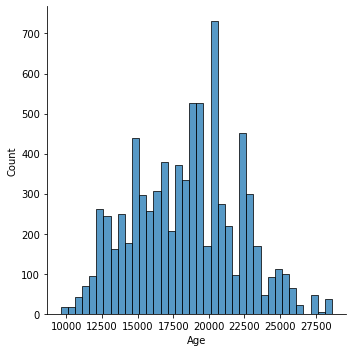

In [9]:
sns.displot(df, x="Age")

### Cleaning

In [10]:
def update(df):
    df_update = df.copy(deep=True)
    df_update.drop(["id"], axis=1, inplace=True)
    df_update["Drug"] = df_update["Drug"].apply(lambda x: 1 if x == "Placebo" else 0)
    df_update["Sex"] = df_update["Sex"].apply(lambda x: 1 if x == "M" else 0)
    df_update["Ascites"] = df_update["Ascites"].apply(lambda x: 1 if x == "N" else 0)
    df_update["Hepatomegaly"] = df_update["Hepatomegaly"].apply(lambda x: 1 if x == "N" else 0)
    df_update["Spiders"] = df_update["Spiders"].apply(lambda x: 1 if x == "N" else 0)
    df_update["Edema"] = df_update["Edema"].apply(lambda x: 1 if x == "N" else 0)
    if "Status" in df.columns: df_update["Status"] = df_update["Status"].apply(lambda x: 2 if x == "D" else (1 if x == "C" else 0))
    return df_update

In [11]:
df_update = update(df)
data = np.array(df_update.loc[:, df_update.columns != 'Status'])
target = np.array(df_update['Status'])

### Prediction

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.2)

In [13]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [14]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [15]:
def loss(y_true, pred):
    return log_loss(y_true, pred, labels=[0, 1, 2])

In [16]:
preds = bst.predict_proba(X_test)

In [17]:
print(preds)
print(y_test)
loss(y_test, preds)

[[0.04722162 0.88279223 0.06998612]
 [0.11477692 0.46023673 0.42498636]
 [0.04721108 0.882802   0.06998689]
 ...
 [0.07951571 0.83233577 0.08814854]
 [0.06872661 0.73122734 0.200046  ]
 [0.04722162 0.88279223 0.06998612]]
[1 1 1 ... 1 1 1]


0.5431798434828672

### Test Data

In [18]:
df_test = pd.read_csv("test.csv")
df_test_update = update(df_test)

In [19]:
preds = bst.predict_proba(np.array(df_test_update))

In [20]:
df_out = pd.DataFrame()
df_out["id"] = df_test["id"]
df_out["Status_C"] = preds[:,1].tolist()
df_out["Status_CL"] = preds[:,0].tolist()
df_out["Status_D"] = preds[:,2].tolist()

In [21]:
df_out.to_csv("submission2.csv", index=False)